In [1]:
import pandas as pd
l_bv = pd.read_csv('../data/likelihood_blogVisits.csv', header=None)

### Problem 4.1.4
**Derive an estimate for the mean number of visits per minute.**

We estimate mean with the MLE of the Exponential distribution, given by: 

\begin{equation}
\hat{\lambda} = \frac{N}{\sum d}
\end{equation}

For $N$ observations, and summing over $d$, each data point.

The mean is then given by $\hat{\lambda}^{-1}$.

In [2]:
def MLE_exp(data):
    N = len(data)
    denom = data[0].sum()
    return N / denom

lam = MLE_exp(l_bv)
print('lam', lam)

lam 1.626214586271851


### Problem 4.1.5
**Graph the log-likelihood near the MLE. Why do we not plot the likelihood?**

\begin{align}
\mathcal{L}(\lambda \mid D) &= \textrm{p}(D \mid \lambda) \\
    &= \prod \textrm{p}(d \mid \lambda) \\
    &= \lambda^{N}e^{-\lambda \sum d} \\
\textrm{log} \mathcal{L}(\lambda \mid D) &= N \textrm{log}(\lambda) - \lambda \sum d \\
\end{align}

We don't plot the likelihood because it is the product of many exponentiations, and hence not visually informative.

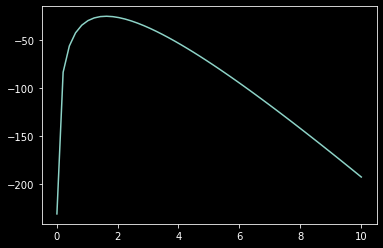

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')


def loglikelihood(lam, data):
    N = len(data)
    accum = data[0].sum()
    return N * np.log(lam) - lam * accum

space = np.linspace(0.01,10)
plt.plot(space, loglikelihood(space, l_bv))

### Problem 4.1.6
**Estimate 95% confidence intervals around your mean value**

In [4]:
# We use the Asymptotic normality 

print(len(l_bv) * lam)

81.31072931359255


We use the Asymptotic Normality of the MLE.
This assumption means that if the MLE is an unbiased estimator for the true parameter, and given some regularity assumptions, that the error of the MLE wrt the true parameter is limits as follows:

\begin{equation}
\sqrt{N}\left(\hat{\theta} - \theta_0\right) \rightarrow \mathcal{N}\left(0, \frac{1}{\mathcal{I}_{1}(\theta_0)}\right)
\end{equation}

For $\mathcal{I}_1(\theta_0)$ being the Fisher information from a single data point. However, the Observed Information is equal to this in the limit, and hence we may alternatively (and validly) use $I(\hat{\theta})$ for the OI of a single point.
This is given by $ - l''(\theta \mid D)$, namely differentiating the log-likelihood of $\theta$ given all data $D$, evaluated at $\hat{\theta}$. This results in:

\begin{align}
\sqrt{N} \left(\hat{\theta} - \theta_0\right) &\rightarrow \mathcal{N}\left(0, \frac{1}{-l''(\theta \mid D)}\right)\\
\end{align}

For our 95% interval, we get:
\begin{align}
\sqrt{N} \left(\hat{\theta} - \theta_0\right) &\in \left[-\frac{1.96}{\sqrt{-l''(\theta \mid D)}},  \frac{1.96}{\sqrt{-l''(\theta \mid D)}}\right]\\
\theta_0 &\in \left[\hat{\theta} - \frac{1.96}{\sqrt{-Nl''(\theta \mid D)}}, \hat{\theta} + \frac{1.96}{\sqrt{-Nl''(\theta \mid D)}} \right]
\end{align}

We can algebraically verify that:
\begin{equation}
l''(\theta \mid D) = -\frac{N}{\theta^2}
\end{equation}

Then for $N = 50, \hat{\theta} = 1.626$, we have:
\begin{equation}
\theta_0 \in \left[ 1.56226, 1.68973 \right]
\end{equation}




### Problem 4.1.7
**What does your interval mean?**

The interval calculated is the interval within which we are 95% certain the population mean lies, given the data gathered.

### Problem 4.1.6
**Using your MLE, what is the probability you will wait: a) 1 min or more, b) 5 min or more, c) half an hour or more?**

Quantities sought:

a) $\mathbb{P}(X > 1) = 1 - F_X(1) = e^{-\lambda}$

b) $\mathbb{P}(X > 5) = 1 - F_X(5) = e^{-5\lambda}$

c) $\mathbb{P}(X > 30) = 1 - F_X(30) = e^{-30\lambda}$

In [14]:
print('a)', np.exp(-lam))
print('b)', np.exp(-5 * lam))
print('c)', np.exp(-30 * lam))

a) 0.19667265417194016
b) 0.00029425231883585523
c) 6.491115902137732e-22


### Problem 4.1.9
**Evaluate your model.**

The model makes some assumptions which aren't necessarily realistic--that there is some underlying basal rate at which visits are made to the site doesn't hold in the case of a site which gradually gains in popularity. A tight spread implies reasonable confidence in our MLE however.

### Problem 4.1.0
**Can you think of a better model? What assumptions are relaxed in this model?**

(array([[10.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.],
        [ 5.,  5.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5, 24. ]),
 <a list of 2 BarContainer objects>)

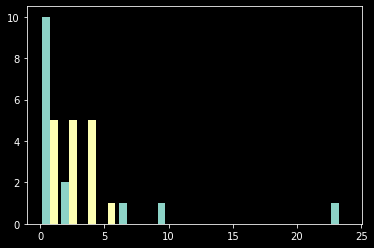

In [7]:
plt.hist(np.histogram(l_bv, bins='auto'), bins='auto')

### Problem 4.2.1
**Graph the violent crime count against population size across all the counties. What relationship suggested?**

In [11]:
l_nyc = pd.read_csv('../data/likelihood_NewYorkCrimeUnemployment.csv')
l_nyc['Population'] = l_nyc['Population'].apply(lambda x: int(x.replace(',','')))
l_nyc['Violent_crime_count'] = l_nyc['Violent_crime_count'].apply(lambda x: int(x.replace(',','')))

        County  Population  Violent_crime_count  Unemployment
0       Albany      308166                  993          0.05
1     Allegany       47972                   68          0.06
2        Bronx     1440569                12713          0.11
3       Broome      197126                  494          0.06
4  Cattaraugus       76828                  133          0.07


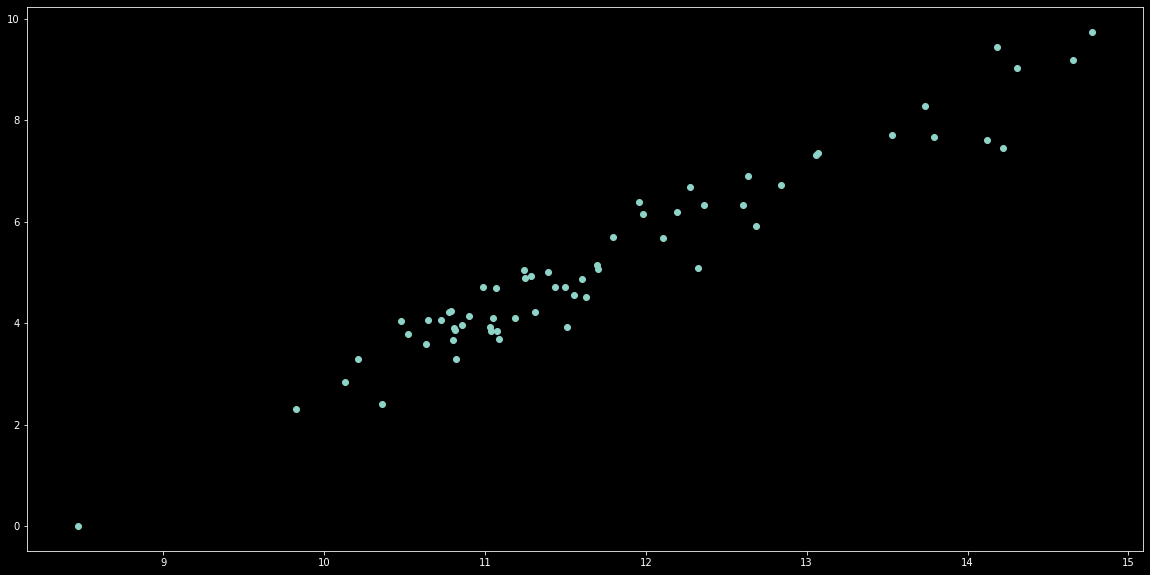

In [13]:
print(l_nyc.head())

plt.figure(figsize=(20,10))
plt.scatter(np.log(l_nyc['Population']), np.log(l_nyc['Violent_crime_count']))
# As the graph indicates, a linear relationship seems appropriate.

### Problem 4.2.2
**A simple model might be to assume that the crime count in a particular county is related to population size by:**
\begin{equation}
crime_i \sim Poisson(n_i \theta)
\end{equation}
For $crime_i$ and $n_i$ being crime count and population in county $i$. What is the likelihood?

\begin{align}
C &\sim Po(n_i \theta) \\
f_C(c) &= \frac{(n_i \theta)^c e^{-n_i \theta}}{c!} \\
\mathcal{L}(\theta \mid D) &= \prod p(d \mid \theta)\\
&= \prod \frac{(n_i \theta)^c e^{-n_i \theta}}{c!} \\
\end{align}

### Problem 4.2.3
**Find the MLE of the parameters**

Given by: $\frac{\sum c_i}{\sum n_i}$.

In [15]:
def MLE_crime_population(data):
        crime_sum = np.sum(data['Violent_crime_count'])
        population_sum = np.sum(data['Population'])
        return crime_sum / population_sum
    
MLE_crime_population(l_nyc) 

0.003660906259312395